In [1]:
import jax
import os
import jax.numpy as jnp
import numpy as np
from jax import random
import time
import pickle
import matplotlib.pyplot as plt

In [2]:
if os.path.isdir('datasets/8fmsk'):
    pass
else:
    os.system('mkdir datasets/8fmsk')

### Dataset generation
Sampling rate 20 kHz


8 equally distant MFSK symbols, one noise signal spacing of 100 Hz

Symbol duration 3

Power has gone through ideal AGC so strength of received signal is equal to one.

Noise will be at Carrier Noise Density ratio 15 dB

Number of waveforms per frequnecy = 1000


In [3]:
sampling_rate = 20e3
frequnecies = jnp.arange(1, 9, 1)*100
# relative_frequency_offset = 0.01
# frequency_offset = relative_frequency_offset * frequnecies
samples = int(sampling_rate)
CNO =  15
num_waveforms = 1000

t = jnp.linspace(0, 1, samples)

waveforms = []

key = random.PRNGKey(time.time_ns())



for idx, freq in enumerate(frequnecies):
    for i in range(num_waveforms):
        key, subkey = random.split(key)
        phase = random.uniform(key, shape=(1,), minval=0, maxval=2*jnp.pi)
        waveforms.append((jnp.sqrt(2)*jnp.sin(2*jnp.pi*freq*t + phase), idx))
for i in range(num_waveforms):
    waveforms.append((jnp.zeros(samples), 8))

# Add noise

waveforms_with_noise = []  

for waveform in waveforms:
    key, subkey = random.split(key)
    waveforms_with_noise.append((waveform[0] + jax.random.normal(subkey, shape=(samples))*jnp.sqrt(sampling_rate/2*1/10**(CNO/10)), waveform[1]))

# Normalize waveforms to power 1
waveforms_with_noise = [(waveform[0]/jnp.sqrt(jnp.mean(waveform[0]**2)), waveform[1]) for waveform in waveforms_with_noise]

# Save waveforms
with open('datasets/8fmsk/waveforms_CNO.pkl', 'wb') as f:
    pickle.dump(waveforms_with_noise, f)

<class 'jaxlib.xla_extension.ArrayImpl'>
1.0000002


ValueError: Input could not be cast to an at-least-1D NumPy array

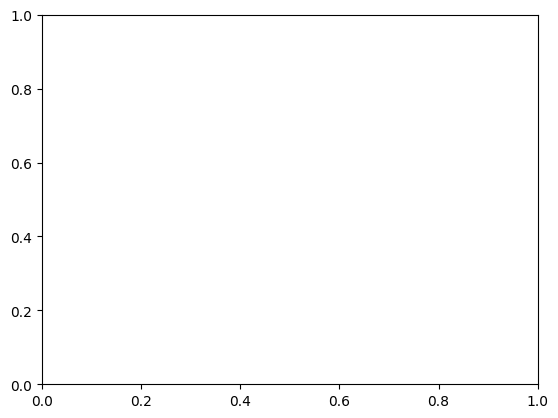

In [4]:

# Calculate mean power of all waveforms
print(type(waveforms_with_noise[1001][0]))
print(jnp.mean(waveforms_with_noise[0][0]**2))
mean_power = [jnp.mean(x[0]**2) for x in waveforms_with_noise]
plt.plot(mean_power)

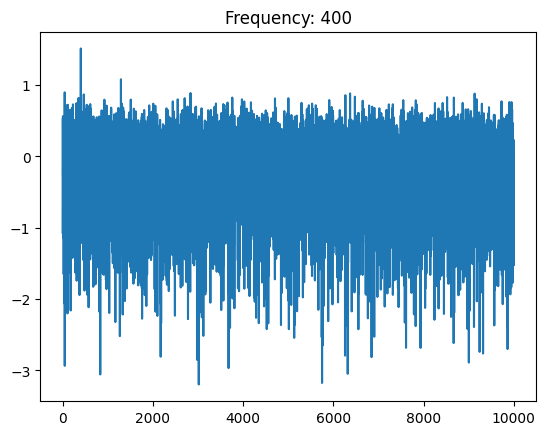

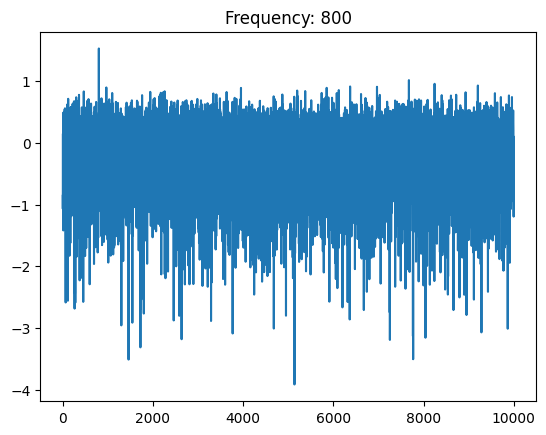

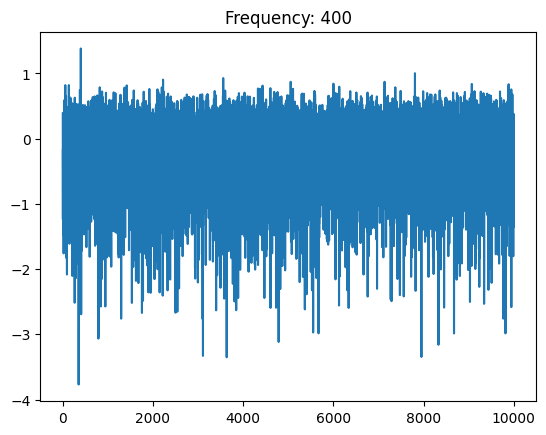

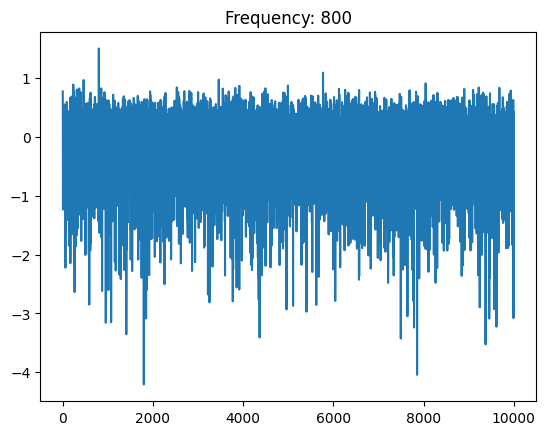

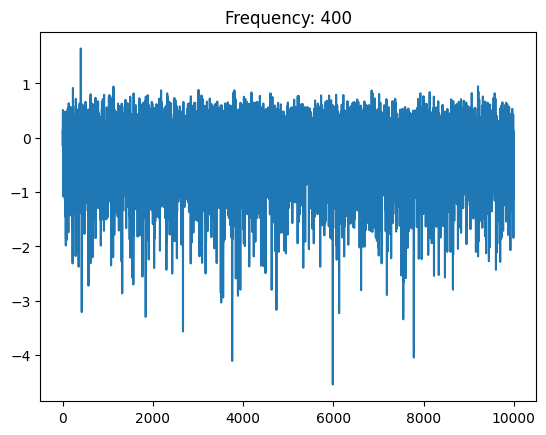

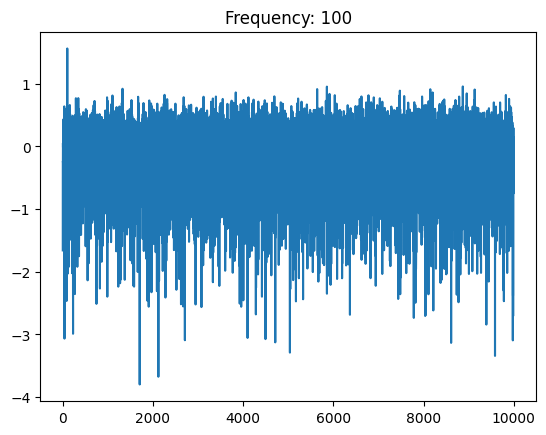

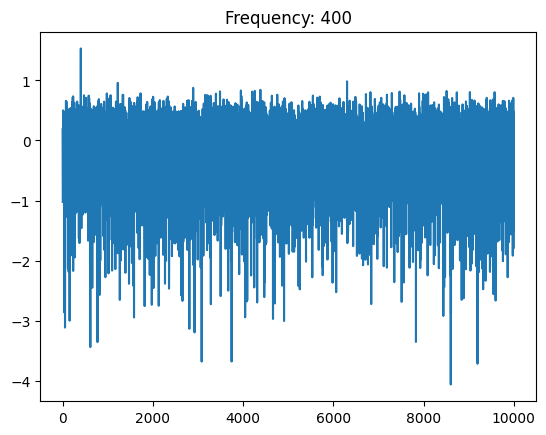

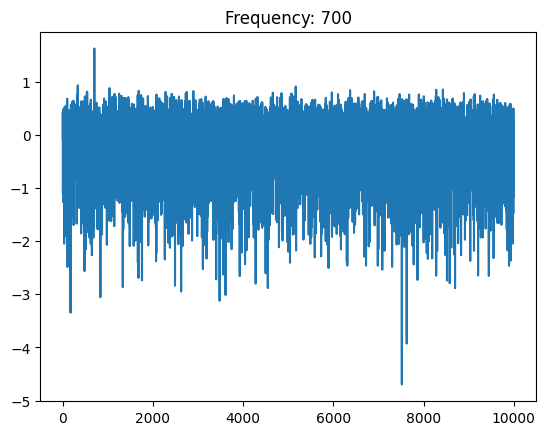

KeyboardInterrupt: 

In [5]:
# Verify 100 random waveforms from the dataset by doing fft plot

for i in range(100):
    k = np.random.choice(len(waveforms_with_noise))
    plt.figure()
    plt.plot(jnp.log10(jnp.abs(jnp.fft.fft(waveforms_with_noise[k][0]))[:10000]**2/20000))
    plt.title(f'Frequency: {frequnecies[waveforms_with_noise[k][1]] if waveforms_with_noise[k][1]!= 8 else "Noise"}')
    plt.show()
    plt.close()

In [ ]:
from scipy.signal import welch

phase = random.uniform(key, shape=(1,), minval=0, maxval=2*jnp.pi)
waveform = jnp.sqrt(2)*jnp.sin(2*jnp.pi*(frequnecies[7]+random.uniform(subkey, 1, minval=-frequency_offset[7]/2,maxval=frequency_offset[7]/2))*t + phase)
noise = waveform 
subkey, _ = random.split(subkey)

freq, psd = welch(noise, fs=sampling_rate, scaling='spectrum')
N0_psd = jnp.mean(psd)
N0_psd, 10*np.log10(1/N0_psd*2)

(Array(0.01162791, dtype=float32), 22.355282306671143)

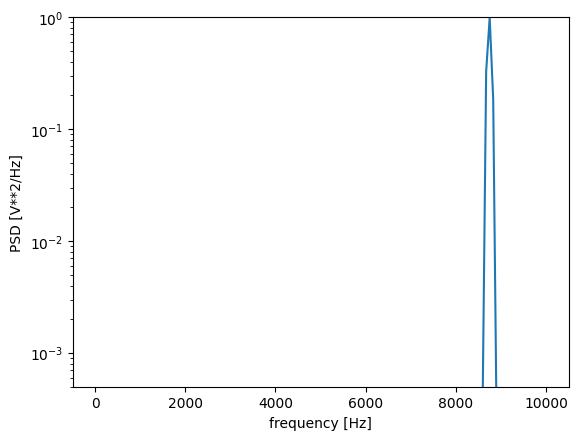

In [ ]:
plt.semilogy(freq, psd)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()